In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
import joblib

In [214]:
from sklearn.preprocessing import MultiLabelBinarizer

In [215]:
import sys
sys.path.append('modules')

import importlib
import data

In [216]:
importlib.reload(sys.modules['data'])

<module 'data' from '/Users/vladparakhin/Documents/GitHub/ML_Gradient_Boosting_Classifier/modules/data.py'>

In [217]:
from data import set_filepath, test_loc, percent_missing, display_test, parse_features

# Trim prediction

In [218]:
stage = 'train'

In [219]:
file_path_lists = set_filepath(stage)
transform_final = file_path_lists[4]

In [220]:
temp = pd.read_csv(transform_final)
temp.loc[231]

VehListdays                                                      48.50059
VehMileage                                                           64.0
Dealer_Listing_Price                                              38900.0
VehYear                                                              2019
ListingID                                                          311804
VehEngine                                           3.6L V6 24V MPFI DOHC
SellerListSrc                                    Digital Motorworks (DMi)
SellerState                                                            PA
VehFuel                                                          Gasoline
VehColorExt                                                         White
VehColorInt                                                         black
VehTransmission                                         8-Speed Automatic
VehFeats                ['1st and 2nd row curtain head airbags', '4-wh...
VehHistory                    ['1 Owne

In [221]:
df_trim_t = pd.read_csv('data/final/train_final_clean.csv')

In [222]:
df_trim_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VehListdays           6298 non-null   float64
 1   VehMileage            6298 non-null   float64
 2   Dealer_Listing_Price  6298 non-null   float64
 3   VehYear               6298 non-null   int64  
 4   ListingID             6298 non-null   int64  
 5   VehEngine             6298 non-null   object 
 6   SellerListSrc         6298 non-null   object 
 7   SellerState           6298 non-null   object 
 8   VehFuel               6298 non-null   object 
 9   VehColorExt           6298 non-null   object 
 10  VehColorInt           6298 non-null   object 
 11  VehTransmission       6298 non-null   object 
 12  VehFeats              6298 non-null   object 
 13  VehHistory            6298 non-null   object 
 14  VehPriceLabel         6298 non-null   object 
 15  VehDriveTrain        

In [223]:
df_trim_t.drop(columns=['ListingID'], inplace=True)

In [224]:
X = df_trim_t.drop('Vehicle_Trim',axis=1)

MultiLabelBinarizer for features list

In [225]:
# Ensure VehFeats is in the correct list format
X['VehFeats'] = X['VehFeats'].apply(parse_features)

In [226]:
X['VehHistory'] = X['VehHistory'].apply(parse_features)

In [227]:
#one_hot_encoded_features : veh_feats_encoded, veh_history_encoded

In [234]:
mlb_feats = MultiLabelBinarizer()

In [235]:
mlb_history = MultiLabelBinarizer()

In [236]:
encoded_feats = mlb_feats.fit_transform(X['VehFeats'])

In [237]:
encoded_history = mlb_history.fit_transform(X['VehHistory'])

In [238]:
feature_col_names = mlb_feats.classes_

In [240]:
history_col_names = mlb_history.classes_

In [241]:
history_col_names[:10]

array([' Accident(s) Reported', ' Buyback Protection Eligible',
       ' Non-Personal Use Reported', ' Title Issue(s) Reported',
       '0 Owners', '1 Owner', '2 Owners', '3 Owners', '4 Owners'],
      dtype=object)

In [242]:
# Convert the encoded matrices to DataFrames
encoded_history_df = pd.DataFrame(encoded_history, columns=mlb_history.classes_)
encoded_feats_df = pd.DataFrame(encoded_feats, columns=mlb_feats.classes_)

In [243]:
# Drop the 'mlb-trnsformed' column(s) from the original dataset
X = X.drop(['VehFeats', 'VehHistory'], axis=1)

In [244]:
for i in X.columns:
   print(i) 

VehListdays
VehMileage
Dealer_Listing_Price
VehYear
VehEngine
SellerListSrc
SellerState
VehFuel
VehColorExt
VehColorInt
VehTransmission
VehPriceLabel
VehDriveTrain
VehMake
VehModel
RatingCategory
SellerCategory
SellerIsPriv
SourceCategory
VehCertified


In [245]:
X = pd.get_dummies(X, drop_first=True)

In [246]:
X = pd.concat([X, encoded_feats_df, encoded_history_df], axis=1)

In [247]:
X.head()

,VehListdays,VehMileage,Dealer_Listing_Price,VehYear,SellerIsPriv,VehCertified,VehEngine_3.6L,VehEngine_3.6L V6,VehEngine_3.6L V6 24V GDI DOHC,VehEngine_3.6L V6 24V MPFI DOHC,...,driver adjustable lumba,Accident(s) Reported,Buyback Protection Eligible,Non-Personal Use Reported,Title Issue(s) Reported,0 Owners,1 Owner,2 Owners,3 Owners,4 Owners
0,8.600069,39319.0,30990.0,2015,False,False,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
1,2.920127,30352.0,34860.0,2017,False,True,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,28.107014,38957.0,23249.0,2015,False,True,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,59.816875,20404.0,31977.0,2018,False,False,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
4,98.665301,19788.0,33495.0,2018,False,False,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [248]:
y = df_trim_t['Vehicle_Trim']

In [249]:
y.head()

0    Limited
1    unknown
2    Limited
3    Limited
4     Luxury
Name: Vehicle_Trim, dtype: object

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
param_grid = {"n_estimators":[1,5,10,20,40,100,120],'max_depth':[3,4,5,6]}

In [255]:
gb_model = GradientBoostingClassifier()

In [256]:
grid = GridSearchCV(gb_model,param_grid)

In [137]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [138]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [139]:
'''An attemp to visualize the flow process. In scikit-learn, the GradientBoostingClassifier does not provide 
   direct access to individual trees or their attributes like a DecisionTreeClassifier does.

   To visualize a specific tree in the gradient boosting ensemble, we might need to fit a separate 
   DecisionTreeClassifier to our data and visualize that decision tree.
'''

from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_classifier = DecisionTreeClassifier(max_depth=6)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

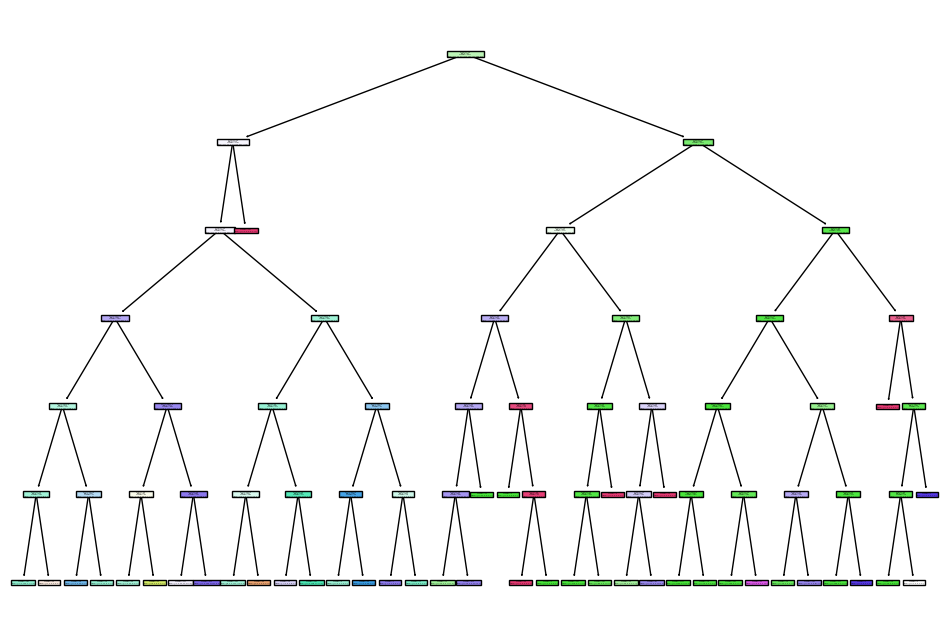

In [64]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_classifier, filled=True)
plt.savefig('decision_tree.png', dpi=300)  # Save as a high-resolution image
plt.show()

In [140]:
from sklearn.metrics import classification_report,accuracy_score

In [141]:
predictions = grid.predict(X_test)

In [142]:
predictions[230:231]

array(['Limited'], dtype=object)

In [143]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

          Base       0.95      0.95      0.95        22
           FWD       1.00      1.00      1.00         6
       Limited       0.99      0.97      0.98       500
        Luxury       0.96      0.93      0.95       107
      Platinum       1.00      1.00      1.00        19
Premium Luxury       0.90      0.96      0.93       203
     Trailhawk       0.84      0.84      0.84        25
       unknown       1.00      0.98      0.99        63

      accuracy                           0.96       945
     macro avg       0.96      0.96      0.96       945
  weighted avg       0.96      0.96      0.96       945



In [144]:
grid.best_estimator_.feature_importances_

array([5.62326363e-03, 1.71119608e-02, 9.07422001e-02, 1.82441770e-02,
       3.31433151e-05, 8.67244266e-03, 1.43153214e-04, 3.83461961e-04,
       7.04658095e-03, 6.56883969e-04, 5.40952441e-04, 1.87964931e-05,
       7.62462473e-03, 1.35842891e-04, 9.18208248e-05, 8.41654657e-02,
       1.31941261e-04, 9.72650474e-04, 2.31940828e-04, 1.95758139e-03,
       1.07891083e-02, 3.02928973e-05, 1.93800198e-05, 1.17133421e-04,
       5.85857833e-05, 7.76457716e-05, 4.65476148e-05, 1.88809151e-05,
       1.79205326e-05, 4.33394780e-05, 1.39392040e-09, 3.38981340e-04,
       7.69542910e-05, 2.65322108e-05, 1.96811453e-04, 4.66175852e-08,
       4.58265740e-04, 4.02053564e-04, 1.72445860e-05, 1.18179510e-04,
       3.20076459e-06, 5.19701610e-04, 3.94746165e-05, 0.00000000e+00,
       4.63390242e-04, 2.37350563e-04, 3.98659795e-05, 2.49348759e-05,
       0.00000000e+00, 3.07600036e-04, 0.00000000e+00, 2.72422486e-07,
       0.00000000e+00, 7.67333828e-06, 2.21044245e-05, 0.00000000e+00,
      

In [145]:
feat_import = grid.best_estimator_.feature_importances_

In [146]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [147]:
imp_feats

,Importance
VehListdays,5.623264e-03
VehMileage,1.711196e-02
Dealer_Listing_Price,9.074220e-02
VehYear,1.824418e-02
SellerIsPriv,3.314332e-05
...,...
bose premium 8-speaker a,1.375276e-07
br,0.000000e+00
brake ass,0.000000e+00
delay-off headli,0.000000e+00


(v, w, x, y, z, ...) in feature importance list are correspond to the MultiLabelBinarizer-transformed columns,
 To display the actual feature names for these columns, we can use the feature_names (i.e., mlb.classes_) list to map the single-letter column names back to the original vehicle feature names.

In [148]:
# Map the single-letter column names to the actual feature names
mapped_names = {old: new for old, new in zip(encoded_mld_df.columns, feature_names)}

mapped_names

{'(*23H)LIMITED-inc: Engine: 3.6L V6 24V VVT UPG I w/ESSTransmission: 8-Speed Automatic (845RE)': '(*23H)LIMITED-inc: Engine: 3.6L V6 24V VVT UPG I w/ESSTransmission: 8-Speed Automatic (845RE)',
 '(*23P)OVERLAND-inc: Engine: 3.6L V6 24V VVT UPG I w/ESSTransmission: 8-Speed Automatic (845RE)': '(*23P)OVERLAND-inc: Engine: 3.6L V6 24V VVT UPG I w/ESSTransmission: 8-Speed Automatic (845RE)',
 '(*23Z)ALTITUDE-inc: Engine: 3.6L V6 24V VVTTransmission: 8-Speed Automatic (845RE)Body Color CladdingsGloss Black Fascia AppliqueBody Color Grille w/Platinum AccentBody Color Shark Fin AntennaDual Bright Exhaust TipsSIRIUSXM Satellite Radio (For more info: 800-643-2112 or www.siriusxm.com)Heated Front SeatsUniversal Garage Door Opener115V Auxiliary Power OutletRemote Start SystemPower LiftgateHeated Steering WheelSecurity AlarmJeep Black Gloss BadgingBlack Headlamp BezelsRear View Auto Dim Mirror w/MicrophoneUconnect AccessFor Details Visit DriveUconnect.comBody Color FasciasPower 4-Way Driver Lumba

In [149]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
VehMake_Jeep,0.175508
Dealer_Listing_Price,0.090742
Audio System Premium Brand Speakers: Bose,0.085967
VehEngine_unknown,0.084165
Auxilliary engine cooler,0.062130
...,...
Aux. Audio Input,0.000000
ABS brakes,0.000000
"ABS brakes,4-Whe",0.000000
Automatic temperature contro,0.000000


In [150]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,941.0,0.001063,0.008446,0.0,0.0,1.570266e-08,0.000047,0.175508


In [158]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.002527]

In [159]:
imp_feats.sort_values('Importance')

,Importance
Adaptive Cruise Control,0.002824
Fog Lights,0.002960
Compass,0.003672
Brake Assist,0.003746
VehColorInt_other,0.003888
Adaptive cruise control,0.005051
VehListdays,0.005623
Cruise,0.006429
Automatic Emergency Braking,0.006681
Active Suspension,0.006871


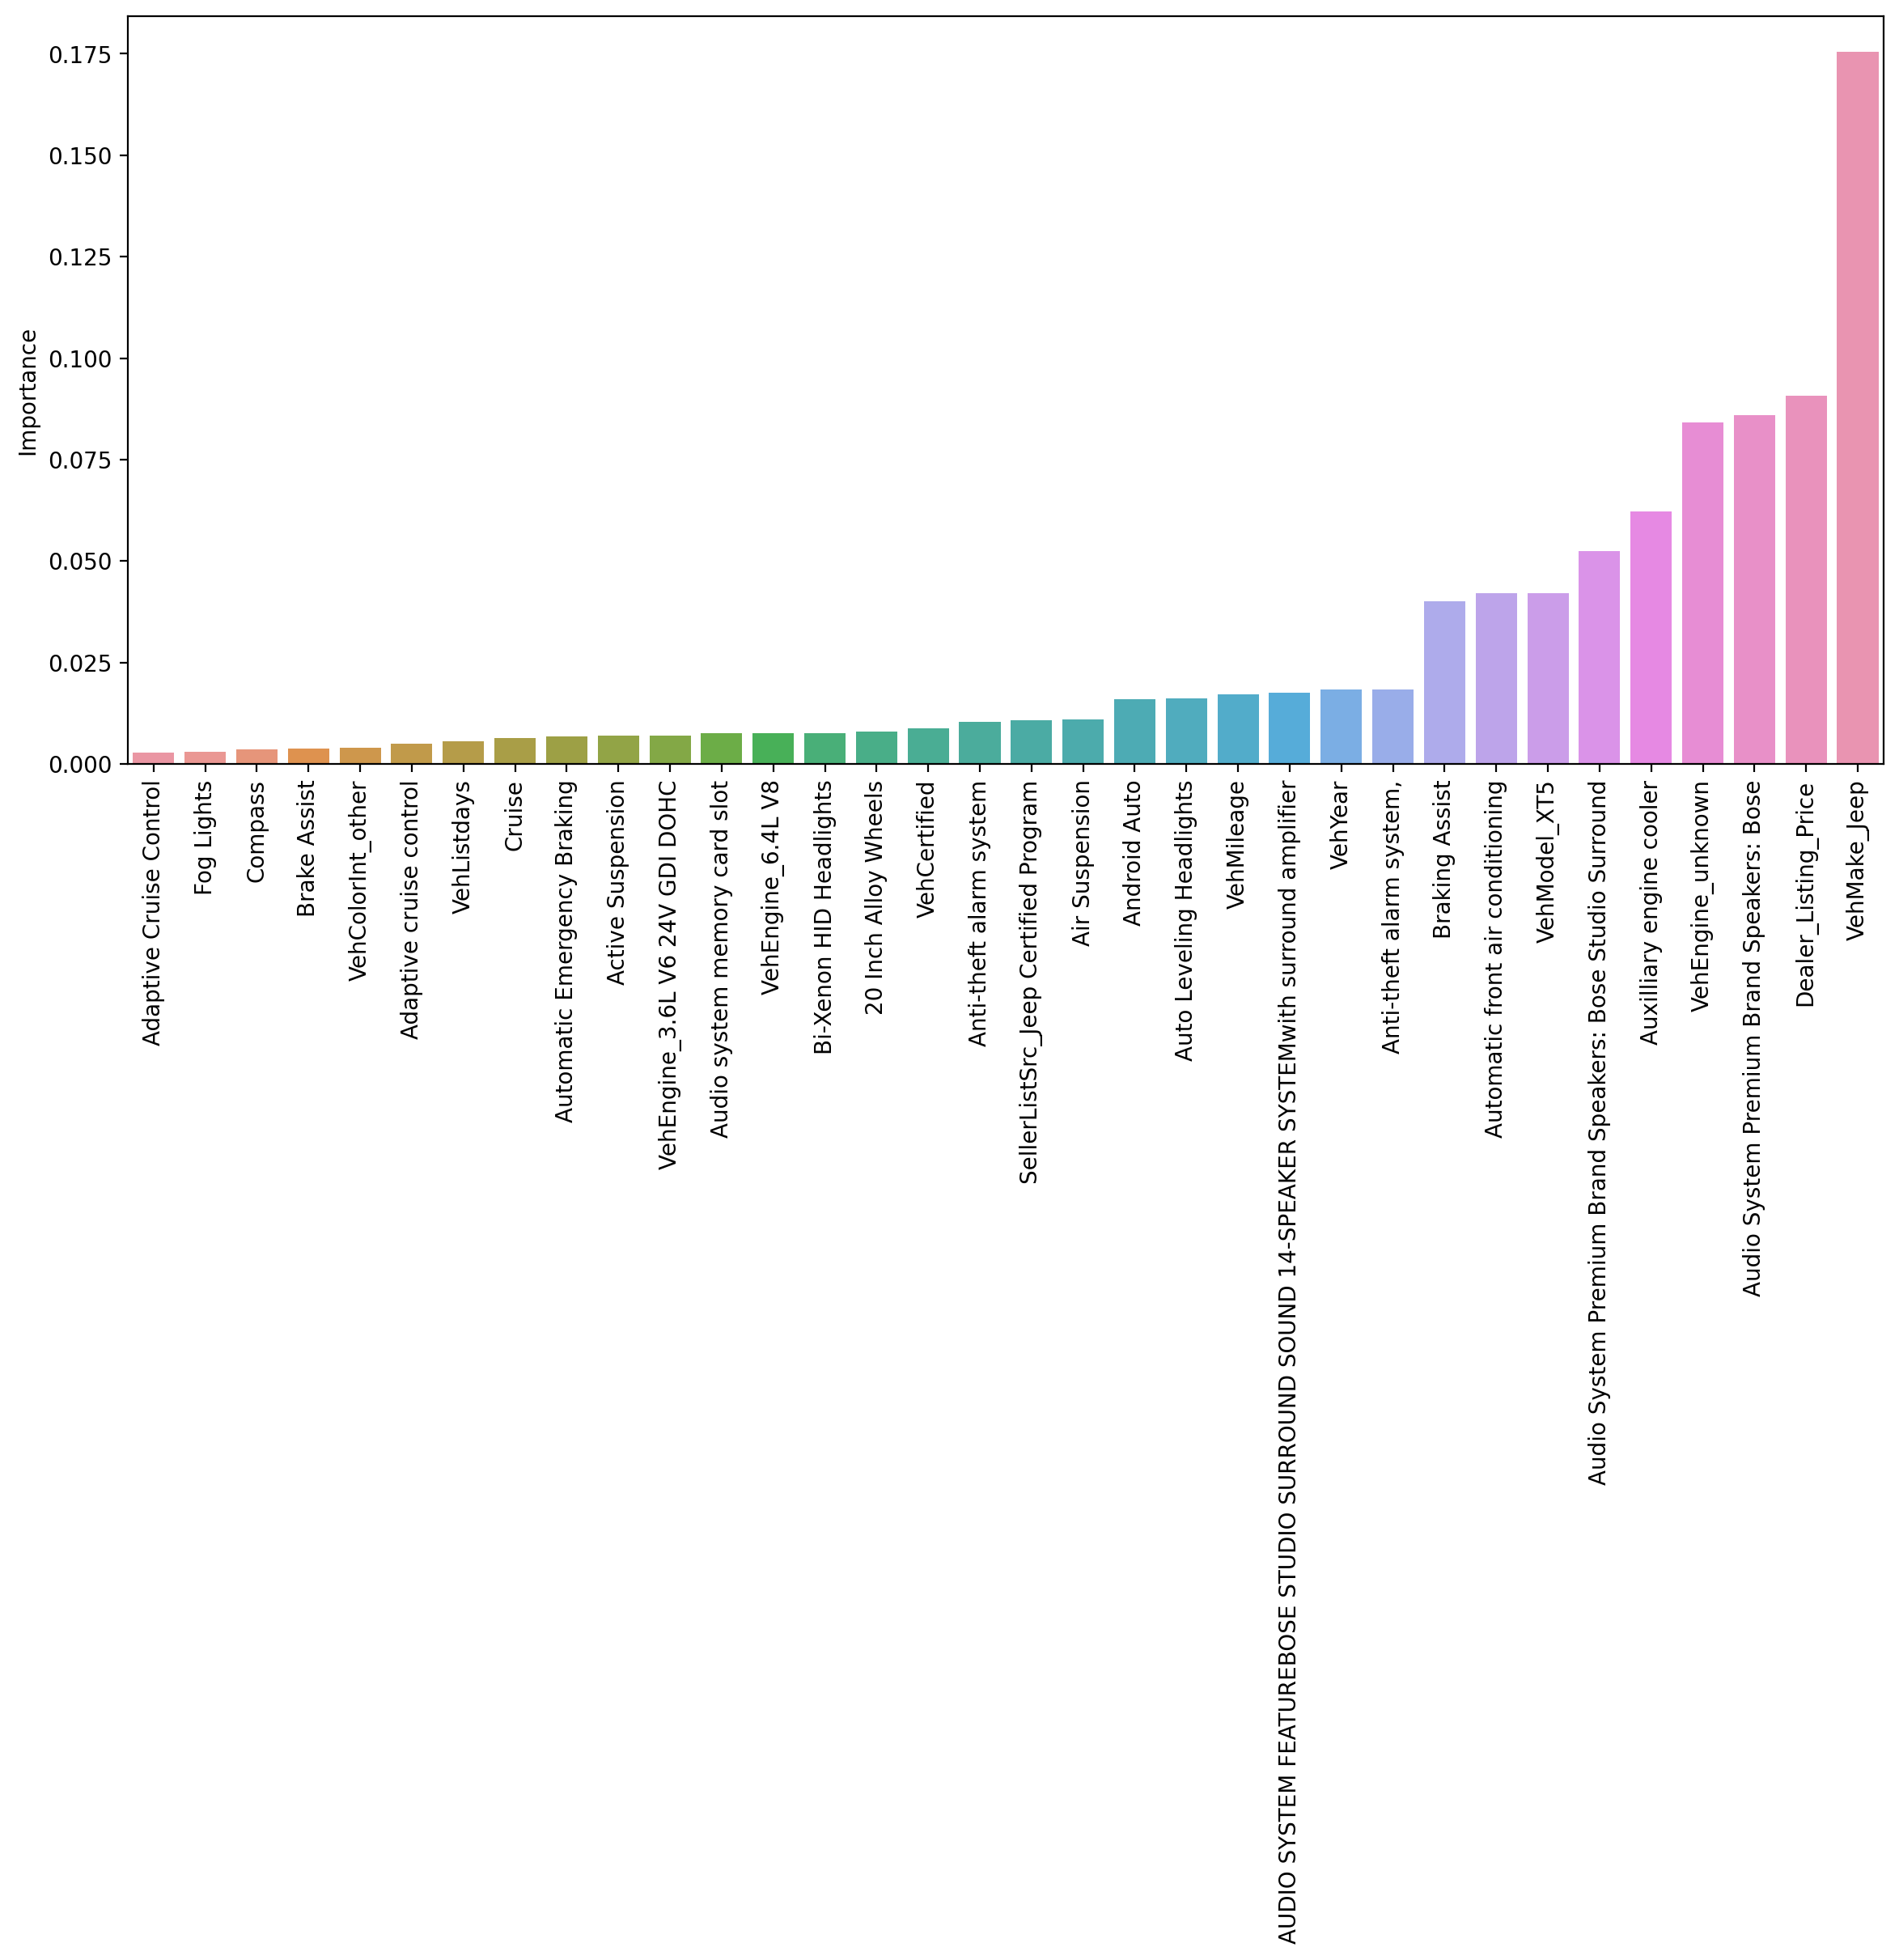

In [160]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [161]:
#filename = 'GridSearchCV_finalized_model.sav'
#joblib.dump(grid, filename)

## Test

In [ ]:
stage = 'test'

In [ ]:
file_path_lists = set_filepath(stage)
transform_final = file_path_lists[4]

In [ ]:
df_test = pd.read_csv(transform_final)

In [ ]:
df_test.columns

In [ ]:
if 'Vehicle_Trim' in df_test.columns:
    df_test.drop('Vehicle_Trim', axis=1, inplace=True)

In [ ]:
X_test_final = pd.get_dummies(df_test, drop_first=True)

In [ ]:
# Recon the columns
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for col in missing_cols:
    X_test_final[col] = 0

In [ ]:
# Checking the column order in the test set matches the column order in the training set
X_test_final = X_test_final[X_train.columns]

In [ ]:
predictions = grid.predict(X_test_final)

In [ ]:
results_df = pd.DataFrame({
    'ListingID': df_test['ListingID'],
    'Vehicle_Trim': predictions
})

In [ ]:
results_df.to_csv('data/report/report.csv', index=False)

In [ ]:
pred_dist_count = results_df['Vehicle_Trim'].value_counts()
pred_dist_count